### Hyperparameter: 
size factor:0.3
batch size:280
num_lineage_1batch: 70
max epoch: 220
temperature:0.5

Execution time: 1.2 hours

In [1]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

In [3]:
# Load data
adata_subset = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/Larry_41201_2000.h5ad')

input_dir = "/Users/apple/Desktop/KB/data/feat_722/feat_722_bs150_sf03_temp05_C150"
X_scCL = np.load(input_dir+"/scBaseEncoderFeat_Z_bs150_tau0.5.npy")
train_loss = np.load(input_dir+"/train_losses_bs150_tau0.5.npy")
lineage_label = adata_subset.obs["clone_id"].to_numpy()

In [4]:
X_scCL.shape ,lineage_label.shape

((41201, 64), (41201,))

In [5]:
score_scCL = calinski_harabasz_score(X_scCL, lineage_label)

In [6]:
# previously score for size factor 0.3 and batch size of 15 is 48
score_scCL


108.78198940549433

In [7]:
train_loss.shape

(220,)

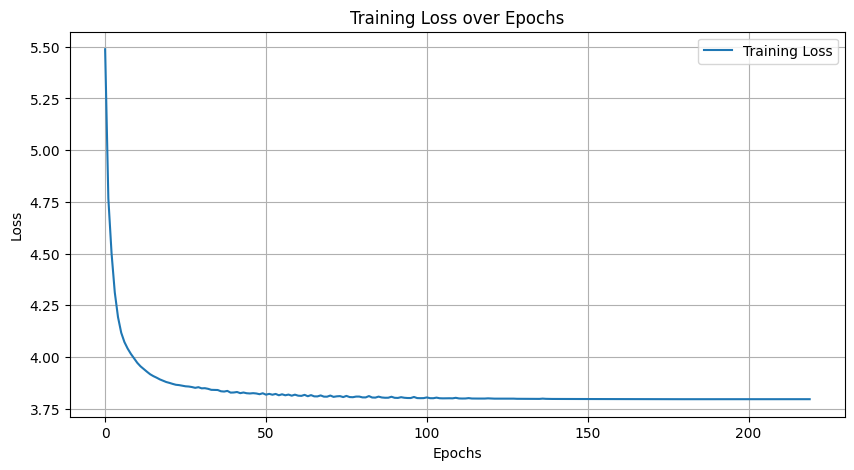

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()